## Laplacianフィルタ
輝度の二次微分を取ることでエッジ検出

True

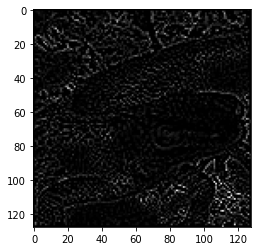

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

def BGR2GRAY(img):
    out = 0.2126*img[:,:,0].copy() + 0.7152*img[:,:,1].copy() + 0.0722*img[:,:,2].copy()
    out = out.astype(np.uint8)
    
    return out


def laplacian_filter(img, K_size=3):
    if len(img.shape)==3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape
    
    # zero padding
    pad = K_size//2
    out = np.zeros((H+2*pad, W+2*pad, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    tmp = out.copy()
    
    # prepare kernel
    K = [[0,1,0],[1,-4,1],[0,1,0]]
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.sum(K*tmp[y:y+K_size, x:x+K_size, c])
                
    out = out[:H, :W]
    out = np.clip(out, 0,255).astype(np.uint8)
    
    return out

img = cv2.imread('../imori.jpg')
gray = BGR2GRAY(img)
out = laplacian_filter(gray, K_size=3)
out = np.squeeze(out)  # これやらないとshapeが違うと言われる

plt.imshow(out,  cmap='gray')
cv2.imwrite('out17.jpg', out)
